# Assignment 01
#### Daniel Mehta

## Exercise 1: From DataFrame to N-Gram

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('tweets.csv')

In [5]:
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,LOSER! https://t.co/p5imhMJqS1,05-18-2020 14:55:14,32295,135445,False,1262396333064892416
1,Twitter for iPhone,Most of the money raised by the RINO losers of...,05-05-2020 18:18:26,19706,82425,False,1257736426206031874
2,Twitter for iPhone,....because they don’t know how to win and the...,05-05-2020 04:46:34,12665,56868,False,1257532112233803782
3,Twitter for iPhone,....lost for Evan “McMuffin” McMullin (to me)....,05-05-2020 04:46:34,13855,62268,False,1257532114666508291
4,Twitter for iPhone,....get even for all of their many failures. Y...,05-05-2020 04:46:33,8122,33261,False,1257532110971318274


In [6]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

import matplotlib.pyplot as plt

In [7]:
def basic_clean(text):
    """
    A simple function to clean up the data. All the words that
    are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [8]:
words = basic_clean(''.join(str(df['text'].tolist())))

In [9]:
words[:20]

['loser',
 'httpstcop5imhmjqs1',
 'money',
 'raised',
 'rino',
 'loser',
 'socalled',
 'lincoln',
 'project',
 'go',
 'pocket',
 'ive',
 'done',
 'judge',
 'tax',
 'regulation',
 'healthcare',
 'military',
 'vet',
 'choice']

#### N-Grams

In [11]:
# bi grams
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(hater, loser)        42
(total, loser)        32
(loser, hater)        14
(amp, loser)          13
(donald, trump)       11
(hater, amp)          11
(separate, winner)     8
(winner, loser)        8
(twist, fate)          6
(loser, happy)         6
Name: count, dtype: int64

In [12]:
# tri grams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(hater, amp, loser)             10
(separate, winner, loser)        8
(hater, loser, happy)            6
(winner, loser, person)          6
(loser, person, reacts)          6
(person, reacts, new)            6
(reacts, new, twist)             6
(new, twist, fate)               6
(everyone, including, hater)     5
(including, hater, loser)        5
Name: count, dtype: int64

In [13]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

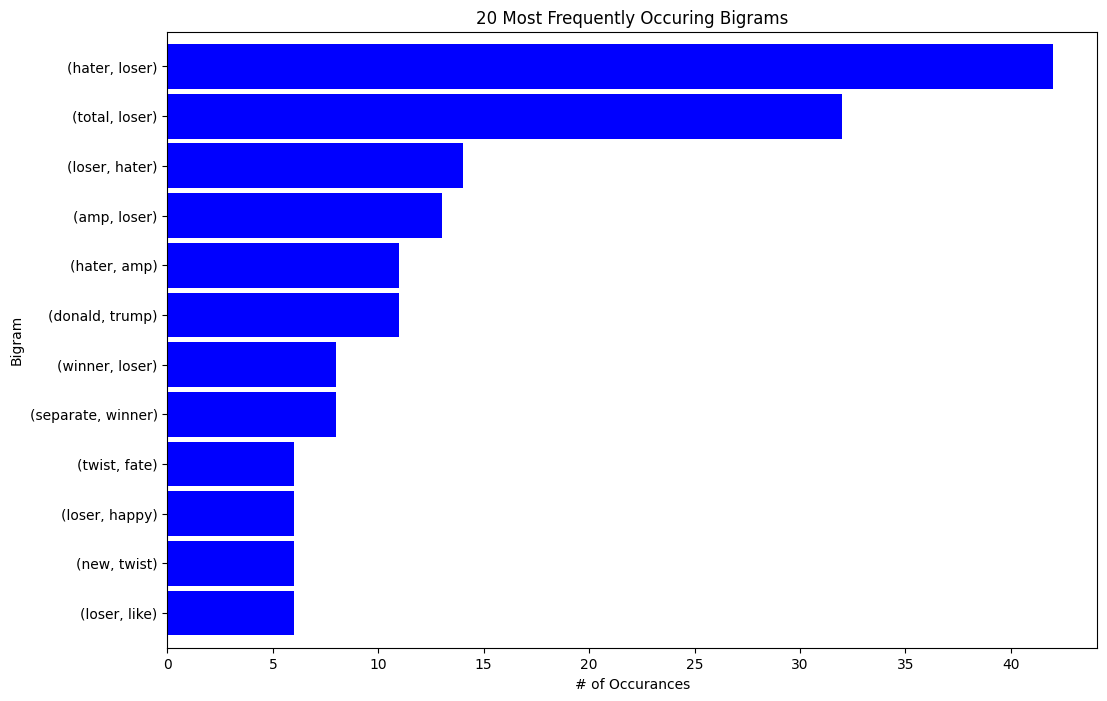

In [14]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

# Exercise 2

### a) Find a new text dataset & b) Convert it into csv formatss

Dataset: [Kaggle - Spam Text Message Classification](https://www.kaggle.com/datasets/team-ai/spam-text-message-classification)

In [17]:
df = pd.read_csv("SPAM text message 20170820 - Data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### c) Redo the same exercise

In [19]:
ADDITIONAL_STOPWORDS = ['u', 'ur', '4', '2', 'im', 'dont', 'dun']

In [20]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]
    

In [21]:
words = basic_clean(''.join(str(df['Message'].tolist())))
words[:20]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif']

#### N-Grams

In [23]:
# bi grams
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(please, call)         53
(call, later)          52
(ill, call)            48
(let, know)            42
(sorry, ill)           39
(new, year)            32
(good, morning)        31
(customer, service)    29
(po, box)              28
(take, care)           26
Name: count, dtype: int64

In [24]:
# tri grams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(ill, call, later)            42
(sorry, ill, call)            38
(prize, guaranteed, call)     21
(happy, new, year)            19
(call, customer, service)     15
(reply, call, 08000930705)    14
(land, line, claim)           14
(private, 2003, account)      13
(2003, account, statement)    13
(pls, send, message)          13
Name: count, dtype: int64

In [25]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

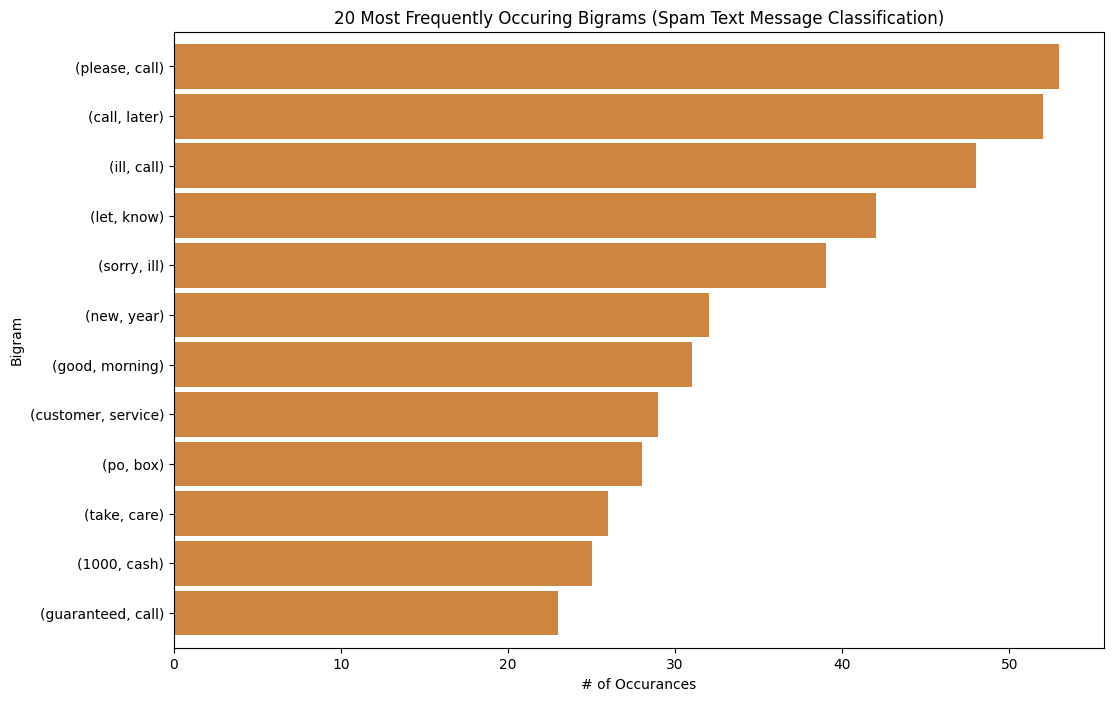

In [26]:
bigrams_series.sort_values().plot.barh(color='peru', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams (Spam Text Message Classification)')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

# Exercise 3: Text Classification Using Naive Bayes

### Dealing with text data
#### Count Example

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [30]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [31]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### Working example in Python

In [33]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [34]:
data = fetch_20newsgroups()

In [35]:
# gets text categories
text_categories = data.target_names

# define training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories)

# define test set
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

In [36]:
print("We have {} unique classes".format(len(text_categories)))
print("We have {} training samples".format(len(train_data.data)))
print("We have {} test samples".format(len(test_data.data)))

We have 20 unique classes
We have 11314 training samples
We have 7532 test samples


In [37]:
print(test_data.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [38]:
# building model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#train model
model.fit(train_data.data, train_data.target)

#Predict categories using testing data
predicted_categories = model.predict(test_data.data)

In [39]:
print(np.array(test_data.target_names)[predicted_categories])

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


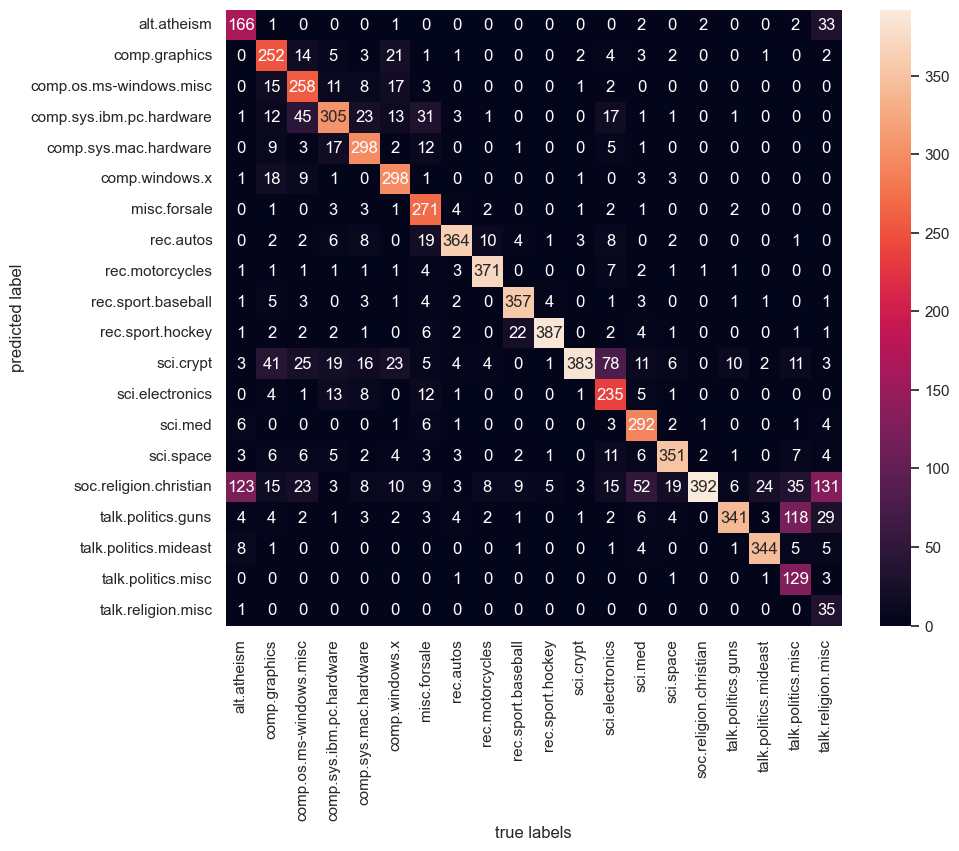

The accuracy is 0.7738980350504514


In [40]:
mat = confusion_matrix(test_data.target, predicted_categories)
plt.figure(figsize=(10, 8))
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

print("The accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))

In [41]:
def my_predictions(my_sentence, model):
    all_categories_names = np.array(data.target_names)
    prediction = model.predict([my_sentence])
    return all_categories_names[prediction]
my_sentence = "jesus"
print(my_predictions(my_sentence, model))

['soc.religion.christian']


In [42]:
my_sentence = "Are you an atheist?"
print(my_predictions(my_sentence, model))

['alt.atheism']
